In [75]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import regularizers
import os

In [3]:
mylist= os.listdir('RawData/')
print(mylist)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-

In [4]:
type(mylist)

list

In [5]:
print(mylist[1])
print(int(mylist[1][18:-4])%2)

03-01-01-01-01-01-02.wav
0


In [6]:
print(mylist[1800])

KL_a01.wav


In [7]:
print(mylist[400][6:-16])

03


In [8]:
data, sampling_rate = librosa.load('RawData/KL_a01.wav')

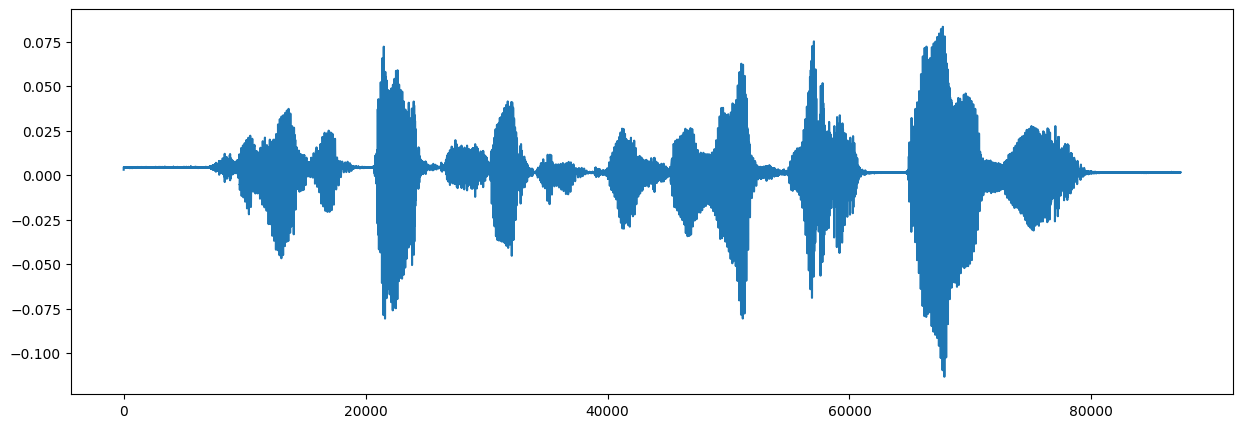

In [9]:
import IPython
%matplotlib inline
plt.figure(figsize=(15, 5))
plt.plot(data)
IPython.display.Audio(data=data, rate=sampling_rate)

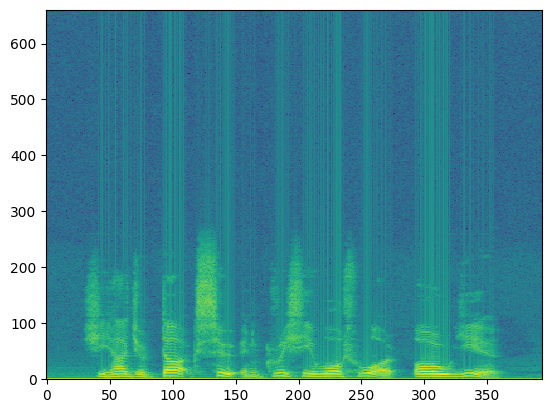

In [10]:
import scipy.io.wavfile
import numpy as np
import sys
import pandas as pd

sr,x = scipy.io.wavfile.read('RawData/KL_a01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [11]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[3]=='a':
        feeling_list.append('male_angry')
    elif item[3]=='f':
        feeling_list.append('male_fearful')
    elif item[3]=='h':
        feeling_list.append('male_happy')
    elif item[3:5]=='sa':
        feeling_list.append('male_sad')


    elif item[0:3]=='YAF' and item[-9:-4]=='happy':
        feeling_list.append('female_happy')
        # print(f'female_happy')
    elif item[0:3]=='OAF' and item[-9:-4]=='happy':
        feeling_list.append('male_happy')
        # print(f'male_happy')

    elif item[0:3]=='YAF' and item[-7:-4]=='sad':
        feeling_list.append('female_sad')
        # print(f'female_sad')
    elif item[0:3]=='OAF' and item[-7:-4]=='sad':
        feeling_list.append('male_sad')
        # print(f'male_sad')
    
    elif item[0:3]=='YAF' and item[-9:-4]=='angry':
        feeling_list.append('female_angry')
        # print(f'female_angry')
    elif item[0:3]=='OAF' and item[-9:-4]=='angry':
        feeling_list.append('male_angry')
        # print(f'male_angry')

    elif item[0:3]=='YAF' and item[-8:-4]=='fear':
        feeling_list.append('female_fearful')
        # print(f'female_fearful')
    elif item[0:3]=='OAF' and item[-8:-4]=='fear':
        feeling_list.append('male_fearful')
        # print(f'male_fearful')

    

    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    

In [12]:
labels = pd.DataFrame(feeling_list)
labels

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
...,...
2795,female_sad
2796,female_angry
2797,female_fearful
2798,female_happy


In [13]:
print(mylist[-1])
print(mylist[-1][3])

YAF_youth_sad.wav
_


In [14]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][3:5]!='su' and mylist[index][3]!='n' and mylist[index][3]!='d':
        X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1      

In [15]:
df[:5]

,feature
0,"[-70.26808, -70.26808, -70.26808, -70.26808, -..."
1,"[-65.707375, -65.707375, -63.11476, -61.5191, ..."
2,"[-65.48282, -65.48282, -65.48282, -65.48282, -..."
3,"[-64.52863, -64.52863, -64.52863, -64.52863, -..."
4,"[-63.64624, -59.995125, -61.87015, -67.49628, ..."


In [16]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [17]:
df3.shape

(2800, 216)

In [18]:
df3[:5]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-58.802547,-57.447964,-58.897030,-58.751503,-57.406185,-60.078960,-63.427284,-62.639057,-61.242519,-61.356304
1,-65.707375,-65.707375,-63.114761,-61.519100,-61.097507,-63.424744,-63.720127,-56.854958,-55.169304,-54.640343,...,-38.301640,-39.792603,-40.614014,-41.209988,-41.439613,-43.994671,-49.399967,-50.591972,-49.112217,-48.155739
2,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,...,-29.195793,-31.348972,-34.310616,-35.803104,-35.938644,-37.633038,-40.119911,-41.663399,-41.552986,-41.974155
3,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-48.872471,-48.674786,-48.596626,-47.603218,-43.049660,-42.660038,-43.189026,-44.001690,-43.328537,-42.985413
4,-63.646240,-59.995125,-61.870152,-67.496277,-71.072220,-65.680321,-63.394951,-65.503853,-61.858971,-60.007896,...,-33.819775,-39.072914,-41.896790,-40.866905,-38.293259,-36.375126,-37.914906,-40.027390,-43.315861,-44.848808


In [19]:
newdf = pd.concat([df3,labels], axis=1)

In [20]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [21]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-57.447964,-58.897030,-58.751503,-57.406185,-60.078960,-63.427284,-62.639057,-61.242519,-61.356304,male_calm
1,-65.707375,-65.707375,-63.114761,-61.519100,-61.097507,-63.424744,-63.720127,-56.854958,-55.169304,-54.640343,...,-39.792603,-40.614014,-41.209988,-41.439613,-43.994671,-49.399967,-50.591972,-49.112217,-48.155739,female_calm
2,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,...,-31.348972,-34.310616,-35.803104,-35.938644,-37.633038,-40.119911,-41.663399,-41.552986,-41.974155,male_calm
3,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-48.674786,-48.596626,-47.603218,-43.049660,-42.660038,-43.189026,-44.001690,-43.328537,-42.985413,female_calm
4,-63.646240,-59.995125,-61.870152,-67.496277,-71.072220,-65.680321,-63.394951,-65.503853,-61.858971,-60.007896,...,-39.072914,-41.896790,-40.866905,-38.293259,-36.375126,-37.914906,-40.027390,-43.315861,-44.848808,male_calm


In [22]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
2034,-19.931461,-23.411400,-28.422916,-25.613405,-22.636303,-20.908556,-22.232586,-22.962978,-22.876326,-23.105900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
2555,-10.182805,-13.730875,-25.262592,-25.059383,-24.820477,-25.309401,-25.547716,-25.236958,-26.898170,-26.361067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_sad
498,-53.145943,-51.843773,-50.109451,-50.054806,-50.523056,-49.810467,-49.574368,-50.369408,-49.524544,-49.933670,...,-25.786844,-23.450327,-23.892323,-23.846331,-23.682253,-24.520531,-24.731022,-24.248787,-20.257608,male_sad
1003,-2.237382,-4.699731,-13.209988,-13.317598,-12.084839,-10.208437,-12.682104,-15.870906,-15.592795,-14.468445,...,-12.911617,-11.744253,-9.940101,-10.685194,-9.927693,-9.015003,-7.486831,-5.752022,1.584844,male_happy
1735,-20.844810,-25.024107,-34.095501,-32.820492,-32.581829,-32.848289,-32.085308,-31.499203,-33.284313,-33.547970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
29,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,-72.010048,...,-44.934868,-45.039612,-45.178719,-45.872707,-46.678879,-45.873295,-47.405457,-39.508915,-34.060524,female_calm
1948,-17.210058,-18.840168,-30.746141,-31.837614,-31.792927,-32.708687,-32.566750,-32.485207,-34.231808,-33.281029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
376,-46.979424,-46.288750,-46.354538,-47.341263,-46.346035,-46.143661,-47.238499,-46.436783,-47.139725,-48.884773,...,-41.907700,-41.889141,-42.147038,-41.602348,-42.335308,-41.981461,-42.531898,-43.745785,-43.982430,male_happy
1701,-30.371763,-25.204479,-22.174236,-23.351397,-25.183647,-27.222136,-28.063618,-26.974852,-27.735229,-27.653370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fearful
1624,-20.999683,-25.183981,-35.662918,-35.177139,-34.504459,-33.510658,-33.674152,-34.291214,-34.090908,-34.404152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry


In [23]:
rnewdf=rnewdf.fillna(0)

In [24]:
len(rnewdf)

2800

In [25]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [26]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1865,-13.625818,-19.367241,-36.008743,-34.816219,-30.042044,-29.259289,-30.629009,-31.727242,-34.699070,-35.896011,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_fearful
1055,-8.681058,-12.625782,-26.937326,-24.797970,-23.364683,-23.512901,-23.563528,-23.986561,-23.946747,-21.039879,...,-5.787906,-2.822307,-1.315362,-1.998824,-1.892000,-1.009779,-0.821525,-0.969900,-0.499555,male_happy
2556,-16.224648,-19.007572,-30.171581,-28.638041,-28.310524,-27.628336,-29.600737,-31.786020,-31.789448,-33.236683,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
2184,-11.607080,-15.714703,-27.914511,-28.720440,-26.739851,-26.794514,-27.798658,-28.439430,-28.503725,-29.192362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_angry
563,-50.077915,-49.866676,-50.077915,-49.911076,-50.008598,-50.078072,-49.785038,-49.236183,-49.006477,-47.116543,...,-38.080822,-41.300911,-42.007839,-40.983486,-43.161400,-45.158546,-44.344719,-44.239708,-44.190994,female_sad
1188,-29.859873,-30.765881,-32.880680,-34.448074,-35.698975,-38.608406,-40.439091,-40.267868,-41.617901,-44.013958,...,-43.273350,-37.321323,-30.551109,-27.834585,-26.978020,-27.281612,-27.756954,-26.292555,-21.787214,male_sad
1259,-20.449598,-23.349293,-29.052723,-32.033043,-31.019535,-30.841698,-31.266552,-32.225479,-33.040401,-34.169071,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_sad
2709,-14.448345,-17.162260,-24.182566,-23.177439,-23.649593,-24.403425,-24.334057,-23.306898,-22.768496,-24.279387,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,female_fearful
718,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,-45.079384,...,-43.588032,-42.803501,-42.723484,-43.573750,-44.581154,-45.079384,-43.456455,-42.601650,-42.604046,male_angry
1956,-13.474751,-16.717752,-26.812693,-25.323383,-25.845671,-28.811384,-28.336565,-25.993755,-25.510824,-25.649334,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_angry


In [27]:
trainfeatures = train.iloc[:, :-1]

In [28]:
trainlabel = train.iloc[:, -1:]

In [29]:
testfeatures = test.iloc[:, :-1]

In [30]:

testlabel = test.iloc[:, -1:]

In [31]:

from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

c:\Users\peper\anaconda3\envs\sentiment_ML\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\peper\anaconda3\envs\sentiment_ML\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
X_train.shape

(2263, 216)

In [34]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [35]:

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

c:\Users\peper\anaconda3\envs\sentiment_ML\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\peper\anaconda3\envs\sentiment_ML\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 216, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 216, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 216, 128)       │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 216, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 216, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 27, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 27, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        34,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,170 (1.39 MB)

 Trainable params: 364,170 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [38]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=500, validation_data=(x_testcnn, y_test))

Epoch 1/500


142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1540 - loss: 2.4415 - val_accuracy: 0.2719 - val_loss: 2.1020
Epoch 2/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2695 - loss: 2.0518 - val_accuracy: 0.2998 - val_loss: 1.9665
Epoch 3/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3246 - loss: 1.9119 - val_accuracy: 0.3389 - val_loss: 1.8664
Epoch 4/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3310 - loss: 1.8127 - val_accuracy: 0.3520 - val_loss: 1.7887
Epoch 5/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3568 - loss: 1.7625 - val_accuracy: 0.3650 - val_loss: 1.7380
Epoch 6/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3976 - loss: 1.6802 - val_accuracy: 0.3780 - val_loss: 1.6940
Epoch 7/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3955 - loss: 1.6386 - val_accuracy: 0.3669 - val_loss: 1.6581
Epoch 8/500
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3919 - loss: 1.6314 - val_accuracy

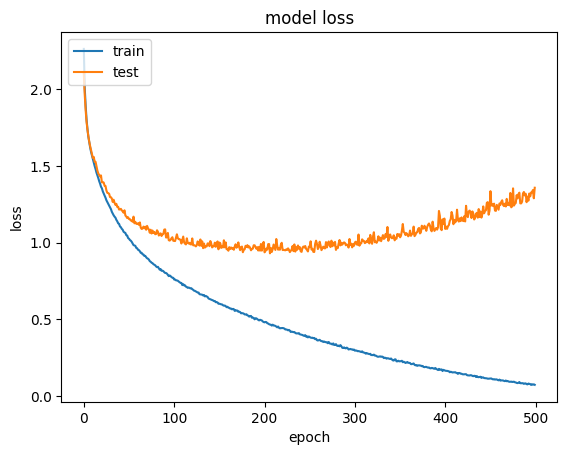

In [39]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at c:\Users\peper\OneDrive\Desktop\ML_Projext\saved_models\Emotion_Voice_Detection_Model.h5 


In [41]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [42]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 68.72%


In [43]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [44]:
preds

array([[4.4986064e-05, 7.7246936e-25, 5.7584747e-15, ..., 2.4428876e-10,
        1.4350841e-06, 3.2528565e-05],
       [1.8882464e-03, 4.0696291e-09, 2.3016025e-09, ..., 2.8003764e-01,
        5.5233195e-02, 4.2816117e-01],
       [3.8919928e-03, 7.3188556e-22, 1.3542431e-17, ..., 6.4902153e-05,
        3.7815073e-06, 9.9603480e-01],
       ...,
       [1.0902629e-04, 2.9965396e-20, 9.3082118e-11, ..., 8.9798791e-09,
        3.4275704e-09, 1.6981854e-05],
       [2.5008646e-09, 8.5565109e-18, 1.1464705e-15, ..., 6.4414130e-06,
        6.7871409e-03, 5.5763572e-01],
       [5.4310198e-12, 1.5379741e-11, 8.9697387e-09, ..., 1.2900513e-01,
        4.8430566e-02, 2.7575633e-03]], dtype=float32)

In [45]:
preds1=preds.argmax(axis=1)

In [46]:
preds1

array([4, 9, 9, 5, 5, 9, 7, 7, 2, 0, 4, 4, 7, 3, 7, 2, 0, 8, 7, 3, 7, 8,
       9, 2, 5, 7, 8, 5, 9, 2, 0, 3, 8, 5, 8, 8, 4, 9, 7, 2, 5, 5, 1, 7,
       5, 4, 3, 4, 0, 2, 5, 1, 8, 4, 8, 5, 9, 8, 3, 2, 2, 5, 8, 5, 7, 9,
       3, 4, 2, 2, 7, 9, 9, 4, 9, 1, 7, 2, 5, 8, 8, 8, 3, 4, 5, 8, 9, 7,
       5, 1, 3, 0, 2, 7, 4, 1, 2, 8, 9, 8, 9, 0, 2, 0, 3, 5, 0, 9, 1, 4,
       2, 9, 0, 0, 4, 7, 3, 9, 5, 5, 5, 3, 7, 4, 9, 8, 8, 9, 2, 5, 4, 2,
       5, 5, 8, 9, 2, 7, 4, 4, 9, 5, 2, 2, 2, 9, 0, 5, 0, 5, 8, 2, 8, 3,
       0, 7, 5, 7, 5, 9, 0, 3, 9, 7, 5, 3, 3, 9, 5, 2, 9, 5, 5, 8, 7, 7,
       9, 4, 5, 9, 7, 9, 0, 8, 5, 7, 7, 5, 8, 4, 4, 9, 8, 9, 7, 9, 9, 6,
       2, 5, 2, 7, 9, 5, 9, 3, 0, 0, 5, 5, 3, 5, 4, 9, 9, 5, 9, 9, 8, 6,
       7, 4, 0, 5, 8, 2, 1, 0, 5, 4, 9, 8, 2, 3, 8, 5, 8, 0, 9, 4, 3, 3,
       9, 2, 4, 3, 4, 2, 4, 5, 2, 5, 7, 0, 4, 0, 9, 7, 0, 3, 2, 2, 7, 0,
       8, 3, 9, 8, 7, 8, 3, 8, 4, 3, 4, 4, 8, 3, 7, 8, 5, 3, 3, 0, 7, 8,
       5, 5, 5, 9, 2, 9, 2, 7, 8, 0, 8, 3, 8, 5, 8,

In [47]:
abc = preds1.astype(int).flatten()

In [48]:
predictions = (lb.inverse_transform((abc)))

In [49]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,female_sad
1,male_sad
2,male_sad
3,male_angry
4,male_angry
5,male_sad
6,male_fearful
7,male_fearful
8,female_fearful
9,female_angry


In [50]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [51]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,female_sad
1,male_sad
2,male_sad
3,male_angry
4,male_happy
5,male_sad
6,male_happy
7,male_angry
8,female_fearful
9,female_fearful


In [52]:
finaldf = actualdf.join(preddf)

In [53]:
finaldf[170:180]

,actualvalues,predictedvalues
170,male_sad,male_sad
171,male_angry,male_angry
172,female_angry,male_angry
173,male_happy,male_happy
174,male_fearful,male_fearful
175,male_fearful,male_fearful
176,male_fearful,male_sad
177,female_sad,female_sad
178,male_sad,male_angry
179,male_fearful,male_sad


                precision    recall  f1-score   support

  female_angry       0.78      0.69      0.73        55
   female_calm       0.50      0.35      0.41        17
female_fearful       0.73      0.86      0.79        56
  female_happy       0.77      0.74      0.75        58
    female_sad       0.87      0.74      0.80        65
    male_angry       0.59      0.78      0.68        65
     male_calm       0.56      0.31      0.40        16
  male_fearful       0.59      0.51      0.55        68
    male_happy       0.75      0.62      0.68        73
      male_sad       0.59      0.78      0.67        64

      accuracy                           0.69       537
     macro avg       0.67      0.64      0.65       537
  weighted avg       0.70      0.69      0.68       537



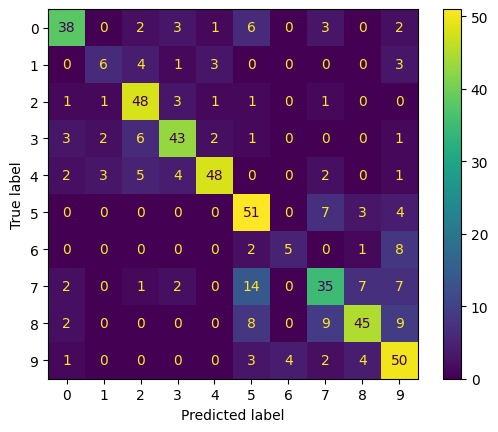

In [76]:
print(classification_report(finaldf['actualvalues'],finaldf['predictedvalues']))
cm = confusion_matrix(finaldf['actualvalues'],finaldf['predictedvalues'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()